**1\. Environmental Setup**

- Import the necessary python libraries
- Ignore warnings
- Connect to DaaS SQL Server using Azure Active Directory Interactive
- Define SQL Queries as variables
- Create variable(s) for filepaths

> **1.1 Import required libraries**

In [3]:
# Import required libraries

import pyodbc                           # ODBC / SQL server connection with Py Notebook
import numpy as np                      # Multi-dimensional arrays and Numerical computation
import pandas as pd                     # Data manipulation & analysis
import pandasql as ps                   # Data Manipulating and cleaning using SQL syntax
import sklearn                          # Machine learning & predictive analysis
import matplotlib.pyplot as plt         # Static, animated and interactive visualizations
import seaborn as sn                    # Statistical data visualization
import statsmodels                      # Statistical models
import plotly.express as px             # Interactive visualizations
import warnings                         # Warnings
from datetime import datetime           # Date and Time functions

warnings.filterwarnings("ignore")

> **1.2 Connect to DaaS SQL server using MS Azure Active Directory Interactive**

In [5]:
# Connect to DaaS SQL server using MS Azure Active Directory Interactive

server = 'tcp:heauksproddatawarehouse01.database.windows.net'
database = 'datawarehouse'
username ='ambareesh.jonnavittula@nationalhighways.co.uk'
Authentication='ActiveDirectoryInteractive'
driver= '{ODBC Driver 17 for SQL Server}'
conn = pyodbc.connect('DRIVER='+driver+
                      ';SERVER='+server+
                      ';PORT=1433;DATABASE='+database+
                      ';UID='+username+
                      ';AUTHENTICATION='+Authentication
                      )

print(conn)

> **1.3 Define SQL queries as variables**

In [6]:
q_jobs = 'SELECT a.[JobID] ,a.[EntryDateTime] ,LEFT(a.[EntryDateTime],4) + \'-\' + SUBSTRING(CONVERT(varchar(25), a.[EntryDateTime]), 6, 2) as Year_Month ,a.[Notes] ,a.[CentralAssetID] ,e.[EastingCentral] ,e.[NorthingCentral] ,CAST(CAST(e.[EastingCentral] as INT) as VARCHAR) + \'_\' + CAST(CAST(e.[NorthingCentral] as INT) as VARCHAR) as East_Nort ,e.[LatitudeCentral] ,e.[LongitudeCentral] ,CAST(FORMAT(e.[LatitudeCentral] , \'##.##\') as VARCHAR) + \'_\' + CAST(FORMAT(e.[LongitudeCentral] , \'##.##\') as VARCHAR) as Lat_Long ,a.[SiteID] ,a.[SiteName] ,a.[PlotNo] ,a.[RouteID] ,a.[RouteName] ,a.[DepotID] ,a.[DepotName] ,a.[RoadName] ,a.[ContractAreaID] ,a.[ContractArea] ,a.[AssetTypeID] ,a.[AssetTypeName] ,a.[LogNo] ,a.[JobTypeName] ,a.[JobStatusFlag] ,a.[JobStatusName] ,a.[FollowUpName] ,a.[JobAssignedOfficerID] ,a.[JobCreatedByOfficerID] ,a.[ContractID] ,a.[DimJobScheduleID] ,a.[PriorityName] ,a.[RegimeID] ,a.[RegimeName] ,a.[StartDateTime] ,a.[ActualStartingDateTime] ,a.[TargetCompletionDateTime] ,a.[CalcTargetCompletionDateTime] ,a.[CompleteDateTime] ,a.[ActualCompletionDateTime] ,a.[ActualCompletionDate] ,a.[ActualCompletionYearMonth] ,a.[ActualCompletionWeekEnd] ,a.[CommitDateTime] ,a.[CommitDate] ,a.[CommitYearMonth] ,a.[CommitMonth] ,a.[CommitWeekStart] ,a.[CommitWeekEnd] ,a.[CommitDayOfWeek] ,a.[CommitDayType] ,a.[CommitDayNight] ,a.[CompletionStatus] ,a.[CompletionStatus (CalcTarget)] ,a.[DeliveredLessThan2Hours] ,a.[DueDateGroup] ,a.[DueDateGroup (CalcTarget)] ,a.[CustomerID] ,d.[Name] as [Customer Name] ,a.[CostID] ,b.ParameterTypeID ,b.ParameterValueID ,c.Name as [% Full] FROM [CONFIRM_Consumption].[FactJob] as a LEFT JOIN CONFIRM.JobParameterValue as b ON a.JobID = b.JobID LEFT JOIN CONFIRM.ParameterValue as c ON b.ParameterValueID = c.ParameterValueID AND b.ParameterTypeID = c.ParameterTypeID LEFT JOIN CONFIRM.Customer as d ON a.[CustomerID] = d.[CustomerID] LEFT JOIN CONFIRM.Asset as e ON a.[CentralAssetID] = e.[CentralAssetID] WHERE a.[AssetTypeID] = \'DRGU\' AND b.ParameterTypeID = \'%FUL\' AND CAST(EntryDateTime as DATE) <= \'2020-01-01\' AND b.IsCurrentFlag = 1 AND c.IsCurrentFlag = 1 AND e.IsCurrentFlag = 1 ORDER BY a.[EntryDateTime], a.JobID ASC'

q_jobs2 = 'SELECT a.[JobID] ,a.[EntryDateTime] ,LEFT(a.[EntryDateTime],4) + \'-\' + SUBSTRING(CONVERT(varchar(25), a.[EntryDateTime]), 6, 2) as Year_Month ,a.[Notes] ,a.[CentralAssetID] ,e.[EastingCentral] ,e.[NorthingCentral] ,CAST(CAST(e.[EastingCentral] as INT) as VARCHAR) + \'_\' + CAST(CAST(e.[NorthingCentral] as INT) as VARCHAR) as East_Nort ,e.[LatitudeCentral] ,e.[LongitudeCentral] ,CAST(FORMAT(e.[LatitudeCentral] , \'##.##\') as VARCHAR) + \'_\' + CAST(FORMAT(e.[LongitudeCentral] , \'##.##\') as VARCHAR) as Lat_Long ,a.[SiteID] ,a.[SiteName] ,a.[PlotNo] ,a.[RouteID] ,a.[RouteName] ,a.[DepotID] ,a.[DepotName] ,a.[RoadName] ,a.[ContractAreaID] ,a.[ContractArea] ,a.[AssetTypeID] ,a.[AssetTypeName] ,a.[LogNo] ,a.[JobTypeName] ,a.[JobStatusFlag] ,a.[JobStatusName] ,a.[FollowUpName] ,a.[JobAssignedOfficerID] ,a.[JobCreatedByOfficerID] ,a.[ContractID] ,a.[DimJobScheduleID] ,a.[PriorityName] ,a.[RegimeID] ,a.[RegimeName] ,a.[StartDateTime] ,a.[ActualStartingDateTime] ,a.[TargetCompletionDateTime] ,a.[CalcTargetCompletionDateTime] ,a.[CompleteDateTime] ,a.[ActualCompletionDateTime] ,a.[ActualCompletionDate] ,a.[ActualCompletionYearMonth] ,a.[ActualCompletionWeekEnd] ,a.[CommitDateTime] ,a.[CommitDate] ,a.[CommitYearMonth] ,a.[CommitMonth] ,a.[CommitWeekStart] ,a.[CommitWeekEnd] ,a.[CommitDayOfWeek] ,a.[CommitDayType] ,a.[CommitDayNight] ,a.[CompletionStatus] ,a.[CompletionStatus (CalcTarget)] ,a.[DeliveredLessThan2Hours] ,a.[DueDateGroup] ,a.[DueDateGroup (CalcTarget)] ,a.[CustomerID] ,d.[Name] as [Customer Name] ,a.[CostID] ,b.ParameterTypeID ,b.ParameterValueID ,c.Name as [% Full] FROM [CONFIRM_Consumption].[FactJob] as a LEFT JOIN CONFIRM.JobParameterValue as b ON a.JobID = b.JobID LEFT JOIN CONFIRM.ParameterValue as c ON b.ParameterValueID = c.ParameterValueID AND b.ParameterTypeID = c.ParameterTypeID LEFT JOIN CONFIRM.Customer as d ON a.[CustomerID] = d.[CustomerID] LEFT JOIN CONFIRM.Asset as e ON a.[CentralAssetID] = e.[CentralAssetID] WHERE a.[AssetTypeID] = \'DRGU\' AND b.ParameterTypeID = \'%FUL\' AND b.IsCurrentFlag = 1 AND c.IsCurrentFlag = 1 AND e.IsCurrentFlag = 1 ORDER BY a.[EntryDateTime], a.JobID ASC'

q_jobs_ts = 'SELECT EOMONTH([EntryDateTime]) as As_Of_YearMonth, COUNT(DISTINCT [JobID]) as Num_Jobs FROM ( SELECT a.[JobID] ,a.[EntryDateTime] ,a.[Notes] ,a.[CentralAssetID] ,a.[SiteID] ,a.[SiteName] ,a.[PlotNo] ,a.[RouteID] ,a.[RouteName] ,a.[DepotID] ,a.[DepotName] ,a.[RoadName] ,a.[ContractAreaID] ,a.[ContractArea] ,a.[AssetTypeID] ,a.[AssetTypeName] ,a.[LogNo] ,a.[JobTypeName] ,a.[JobStatusFlag] ,a.[JobStatusName] ,a.[FollowUpName] ,a.[JobAssignedOfficerID] ,a.[JobCreatedByOfficerID] ,a.[ContractID] ,a.[DimJobScheduleID] ,a.[Easting] ,a.[Northing] ,a.[Latitude] ,a.[Longitude] ,a.[PriorityName] ,a.[RegimeID] ,a.[RegimeName] ,a.[StartDateTime] ,a.[ActualStartingDateTime] ,a.[TargetCompletionDateTime] ,a.[CalcTargetCompletionDateTime] ,a.[CompleteDateTime] ,a.[ActualCompletionDateTime] ,a.[ActualCompletionDate] ,a.[ActualCompletionYearMonth] ,a.[ActualCompletionWeekEnd] ,a.[CommitDateTime] ,a.[CommitDate] ,a.[CommitYearMonth] ,a.[CommitMonth] ,a.[CommitWeekStart] ,a.[CommitWeekEnd] ,a.[CommitDayOfWeek] ,a.[CommitDayType] ,a.[CommitDayNight] ,a.[CompletionStatus] ,a.[CompletionStatus (CalcTarget)] ,a.[DeliveredLessThan2Hours] ,a.[DueDateGroup] ,a.[DueDateGroup (CalcTarget)] ,a.[CustomerID] ,d.[Name] as [Customer Name] ,a.[CostID] ,b.ParameterTypeID ,b.ParameterValueID ,c.Name as [% Full] FROM [CONFIRM_Consumption].[FactJob] as a LEFT JOIN CONFIRM.JobParameterValue as b ON a.JobID = b.JobID LEFT JOIN CONFIRM.ParameterValue as c ON b.ParameterValueID = c.ParameterValueID AND b.ParameterTypeID = c.ParameterTypeID LEFT JOIN CONFIRM.Customer as d ON a.[CustomerID] = d.[CustomerID] WHERE a.[AssetTypeID] = \'DRGU\' AND b.ParameterTypeID  = \'%FUL\' AND b.IsCurrentFlag = 1 AND c.IsCurrentFlag = 1  ) as t1 GROUP BY EOMONTH([EntryDateTime]) ORDER BY EOMONTH([EntryDateTime]) ASC'

q_floods = 'SELECT a.[FloodID] ,a.[Road] ,a.[Area] ,a.[Latitude] ,a.[Longitude] ,a.[CarriagewayDirection] ,a.[CarriagewayType] ,a.[SectionID] ,a.[FloodStatus] ,a.[MaxEffect] ,a.[ReportedDateTime] ,a.[AffectedLength] ,a.[FloodSeverityIndex] ,a.[IsDeletedFlag] ,a.[IsCurrentFlag] ,b.[FloodHotspotID] ,b.[BaselineID] ,b.[BaselineRiskLevel] ,b.[IsFloodRiskAreaID] ,b.[ActionStatus] ,b.[OverallStatus] FROM [DDMS].[FloodIncident] as a LEFT JOIN [DDMS].[FloodHotspot] as b ON a.Road = b.Road AND a.Area = b.Area AND a.CarriagewayDirection = b.Direction'

q_job_pmt = 'SELECT OrderJobID, SUM(PaymentValue) + SUM(FeeValue) as [Payment_Amount] FROM CONFIRM_Secure.JobPaymentItem WHERE IsCurrentFlag = 1 GROUP BY OrderJobID'

> **1.4 Create variables for file path(s)**

In [4]:
# Azure VM switch (Code runs from inside the Azure VM)
VM = 1

filepath = r'C:\Users\ajonnavittula\OneDrive - Highways England\Project Work\Datasets/' if VM == 1 else r'C:\Users\jonnaa\OneDrive - Highways England\Project Work\Code & Scripts\Datasets/' 
filepath_code = r'C:\Users\ajonnavittula\OneDrive - Highways England\Project Work\Code & Scripts\Datasets/' if VM == 1 else r'C:\Users\jonnaa\OneDrive - Highways England\Project Work\Code & Scripts\Code & Scripts\Datasets/' 

**2\. Data Preparation**

- Import jobs & assets data from DaaS 
- Extract aggregated Weather data from SWIS 
- Merge the datasets using location and nearest weather station using Haversine Triangulation formula

> **2.1 Import Data from DaaS**

> > **2.1.1 CONFIRM\_Consumption - Jobs**

In [7]:
# Read SQL table [CONFIRM_Consumption].[FactJob] - All (%FUL) jobs performed on gullies
df_jobs = pd.read_sql_query(q_jobs , conn)

# Data Transformations
df_jobs["Year"] = df_jobs["Year_Month"].str[:4]
df_jobs["Month"] = df_jobs["Year_Month"].str[-2:]
df_jobs.loc[df_jobs['% Full'] == 'Clear', '% Full'] = '0 % (Clear)'

# Convert Data types
df_jobs['EntryDate'] = df_jobs.EntryDateTime.astype('str').str[:4] + '_' + df_jobs.EntryDateTime.astype('str').str[5:7] + '_' + df_jobs.EntryDateTime.astype('str').str[8:10]

# Establish a dictionary for Lat_Long for a Central asset ID
df_AssetLoc = df_jobs[['CentralAssetID', 'LatitudeCentral', 'LongitudeCentral']].drop_duplicates().reset_index()
df_AssetLoc = df_AssetLoc.drop('index', 1)
df_AssetLoc.columns = ['CentralAssetID', 'lat', 'lon']
df_AssetLoc = pd.pivot_table(data=df_AssetLoc,index=['CentralAssetID']).T
dict_AssetLoc = df_AssetLoc.to_dict()

df_jobs.head(1)

,JobID,EntryDateTime,Year_Month,Notes,CentralAssetID,EastingCentral,NorthingCentral,East_Nort,LatitudeCentral,LongitudeCentral,...,DueDateGroup (CalcTarget),CustomerID,Customer Name,CostID,ParameterTypeID,ParameterValueID,% Full,Year,Month,EntryDate
0,41196417,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/040785,350233.56,530218.65,350233_530218,54.664585,-2.773067,...,Due Date Passed,HE,Highways England,A563350,%FUL,NK,Change Me,2018,03,2018_03_29


In [8]:
print('Total Jobs recorded : ', len(df_jobs))
print('Total number of Asset locations : ', len(dict_AssetLoc))

Total Jobs recorded :  122222
Total number of Asset locations :  70129


In [9]:
# Read SQL table [CONFIRM_Consumption].[FactJob] - All (%FUL) jobs performed on gullies - (No filter on Year)
df_jobs2 = pd.read_sql_query(q_jobs2 , conn)
df_jobs2["Year"] = df_jobs2["Year_Month"].str[:4]
df_jobs2.loc[df_jobs2['% Full'] == 'Clear', '% Full'] = '0 % (Clear)'

In [10]:
df_jobs2.shape

(793709, 65)

> > **2.1.2 DDMS - Floods dataset**

In [11]:
# Read SQL table [DDMS].[FloodIncidents]
df_floods = pd.read_sql_query(q_floods , conn)

df_floods.shape

(472516, 21)

In [12]:
df_floods.head(2)

,FloodID,Road,Area,Latitude,Longitude,CarriagewayDirection,CarriagewayType,SectionID,FloodStatus,MaxEffect,...,AffectedLength,FloodSeverityIndex,IsDeletedFlag,IsCurrentFlag,FloodHotspotID,BaselineID,BaselineRiskLevel,IsFloodRiskAreaID,ActionStatus,OverallStatus
0,18755,M60,10,53.438609,-2.130051,CW,Main Carriageway,4200M60/679,Closed,Hard shoulder only,...,NaN,4.80,False,False,221.0,1025.0,A (Very High),Yes,Required - not done or not completed,A (Very High)
1,514,A40,2,51.872160,-2.405290,WB,Main Carriageway,1600A40/678,Historic,None,...,NaN,0.67,False,False,154.0,216.0,C (Moderate),Yes,Required - not done or not completed,C (Moderate)


> > **2.1.3 Job Payments**

In [21]:
# Commented because Access got revoked - 21st April
# # Read SQL table [CONFIRM_Secure].[JobPaymentItem]
# df_job_pmt = pd.read_sql_query(q_job_pmt , conn)
# df_job_pmt.shape

# Job Payments - Random value between 10 and 15000
df_job_pmt = pd.read_csv(filepath + 'Job_Payments_dummy.csv')

df_job_pmt.head(2)

,JobID,Payment_Amount
0,41196417,531
1,41196418,399


> **2.2 Merge Jobs, Elevation & Location**

In [15]:
# PostCodes Dataset
df_loc = pd.read_csv (filepath + 'UK Locations_csv\National_Statistics_Postcode_Lookup_UK.csv')
df_loc = df_loc[['Postcode 2', 'County Code', 'County Name', 'Easting', 'Northing', 'Latitude', 'Longitude', 'Output Area Classification Name']]
df_loc['Lat_Long'] = df_loc['Latitude'].round(2).astype(str) + '_' + df_loc['Longitude'].round(2).astype(str)
df_loc['Post_code_noSpaces'] = df_loc['Postcode 2'].str.replace(' ', '')

# Altitude/Elevation Data
df_elev = pd.read_csv (filepath + 'Elevation_csv\open_postcode_elevation.csv')
df_elev.columns = ['Post_code', 'Elevation(m)']
df_elev['Post_code_noSpaces'] = df_elev['Post_code'].str.replace(' ', '')
del df_elev['Post_code']

# Merge Location & Elevation 
df_loc_elev = pd.merge(df_loc, df_elev, how='left', on = 'Post_code_noSpaces')
df_loc_elev['Elevation(ft)'] = df_loc_elev['Elevation(m)'] * 3.28084
df_loc_elev.sort_values(by=['Lat_Long'], inplace=True)

# Elevation by Location
df_loc_elev2 = df_loc_elev[['Lat_Long', 'Latitude', 'Longitude', 'Elevation(m)', 'Elevation(ft)']]
df_loc_elev2['Latitude'] = df_loc_elev2['Latitude'].round(2)
df_loc_elev2['Longitude'] = df_loc_elev2['Longitude'].round(2)
df_loc_elev2 = df_loc_elev2.drop_duplicates(['Lat_Long', 'Latitude', 'Longitude', 'Elevation(m)', 'Elevation(ft)'])
df_loc_elev2 = df_loc_elev2.groupby(['Lat_Long', 'Latitude', 'Longitude'])['Elevation(m)', 'Elevation(ft)'].mean().reset_index()

# Merge Jobs, Location, Elevation 
df_jobs_loc_elev = pd.merge(df_jobs, df_loc_elev2,  how='left', left_on=['Lat_Long'], right_on = ['Lat_Long'])
df_jobs_loc_elev.head(2)


,JobID,EntryDateTime,Year_Month,Notes,CentralAssetID,EastingCentral,NorthingCentral,East_Nort,LatitudeCentral,LongitudeCentral,...,ParameterTypeID,ParameterValueID,% Full,Year,Month,EntryDate,Latitude,Longitude,Elevation(m),Elevation(ft)
0,41196417,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/040785,350233.56,530218.65,350233_530218,54.664585,-2.773067,...,%FUL,NK,Change Me,2018,03,2018_03_29,54.66,-2.77,150.0,492.126
1,41196418,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/041344,350310.17,529899.18,350310_529899,54.661722,-2.771825,...,%FUL,NK,Change Me,2018,03,2018_03_29,54.66,-2.77,150.0,492.126


> **2.3 Incorporate Haversine Triangulation to identify the nearest Radar location in relation to the gully/asset**

In [16]:
## Note - The Earth's radius 'R' varies from 3949.902 miles (6356.752 km) at the poles to 3963.190 (6378.137) km at the equator. 

# 1. Identify the geographical distance between 2 locations in miles (using Lat & Long as args)
def geo_dist(*args):

    from math import asin, cos, radians, sin, sqrt
    lat1, lat2, long1, long2 = map(radians, args)
    R_earth = 3958.756                                  # 6371 km
    
    dist_lats = abs(lat2 - lat1) 
    dist_longs = abs(long2 - long1) 

    x = sin(dist_lats/2)**2 + cos(lat1) * cos(lat2) * sin(dist_longs/2)**2
    y = asin(sqrt(x)) * 2
 
    return y * R_earth

# 2. Identify the closest Radar location from a given location 
def closest_Radar(radar_locs, x):
    try:
        return min(radar_locs, key=lambda p: geo_dist(x['lat'],p['lat'],x['lon'],p['lon']))
    except TypeError:
        print('Not a list or not a number.')

# 3. Import Radar Locations from SWIS
df_Radar_Loc = pd.read_csv (filepath + 'SWIS_Locations/Locations.csv')

# 4. Necessary Transformations
df_Radar_Loc = df_Radar_Loc[df_Radar_Loc['ESS ID'] > 0]
df_Radar_Loc['ESS ID'] = df_Radar_Loc['ESS ID'].astype(int).astype(str)
df_Radar_Loc.columns = ['ESS ID', 'HE Area', 'lat', 'lon']
df_Radar_Loc = df_Radar_Loc.drop('HE Area', 1)

# 5. Pivot Radar Locations and Convert into a dictionary
df_Radar_Loc_t = pd.pivot_table(data=df_Radar_Loc,index=['ESS ID']).T
dict_RadarLoc = df_Radar_Loc_t.to_dict()

# 6. Find the nearest Radar location for our jobs
list_AssetID = []
list_RadarLoc = []
list_lat = []
list_lon = []

for k_a, v_a in dict_AssetLoc.items():
    v_radarloc = closest_Radar(dict_RadarLoc.values() , v_a )
    list_AssetID.append(k_a)
    list_RadarLoc.append(v_radarloc)
    list_lat.append(v_radarloc['lat'])
    list_lon.append(v_radarloc['lon'])

df_Asset_Radar_Link = pd.DataFrame(list_AssetID, columns = {'AssetID'})
df_Asset_Radar_Link['Radar_Loc'] = list_RadarLoc
df_Asset_Radar_Link['Radar_Lat'] = list_lat
df_Asset_Radar_Link['Radar_Lon'] = list_lon

# 7. Merge to Get Radar IDs 
df_Asset_Radar_Link = pd.merge(df_Asset_Radar_Link , df_Radar_Loc,  \
                                how='left', left_on=['Radar_Lat', 'Radar_Lon'], right_on = ['lat', 'lon'])
df_Asset_Radar_Link = df_Asset_Radar_Link[['AssetID', 'Radar_Lat', 'Radar_Lon', 'ESS ID']]
df_Asset_Radar_Link.columns = ['AssetID', 'Radar_Lat', 'Radar_Lon', 'Radar ID']

# 8. Merge to link Radar locations with Jobs
df_jobs_lc_el_rd = pd.merge(df_jobs_loc_elev , df_Asset_Radar_Link,  \
                                how='left', left_on=['CentralAssetID'], right_on = ['AssetID'])

df_jobs_lc_el_rd.head(2)

,JobID,EntryDateTime,Year_Month,Notes,CentralAssetID,EastingCentral,NorthingCentral,East_Nort,LatitudeCentral,LongitudeCentral,...,Month,EntryDate,Latitude,Longitude,Elevation(m),Elevation(ft),AssetID,Radar_Lat,Radar_Lon,Radar ID
0,41196417,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/040785,350233.56,530218.65,350233_530218,54.664585,-2.773067,...,03,2018_03_29,54.66,-2.77,150.0,492.126,DRGU/040785,54.674595,-2.77809,10071
1,41196418,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/041344,350310.17,529899.18,350310_529899,54.661722,-2.771825,...,03,2018_03_29,54.66,-2.77,150.0,492.126,DRGU/041344,54.674595,-2.77809,10071


> **2.4 Import Weather data & merge with the Jobs**

In [17]:
df_weather = []

# Import Weather data 
df_weather = pd.read_csv(filepath + 'Weather/Weather_Aggregated.csv')

# Necessary Transformations
df_weather = df_weather.replace(np.nan, '').iloc[:,1:]

# Convert Data types
df_jobs_lc_el_rd['Radar ID'] = df_jobs_lc_el_rd['Radar ID'].replace(np.nan, None).astype('str').str.strip()
df_weather.RadarID = df_weather.RadarID.astype('str').str.strip()
df_weather.Date = df_weather.Date.str.strip().str[:4] + '_' + df_weather.Date.str.strip().str[5:7] + '_' + df_weather.Date.str.strip().str[-2:]

# Merge with Jobs 
df_jobs_weather = pd.merge(df_jobs_lc_el_rd, df_weather, how='left', \
                                left_on=['Radar ID', 'EntryDate'] , right_on = ['RadarID', 'Date'])
                    
df_jobs_weather.head(2)  

,JobID,EntryDateTime,Year_Month,Notes,CentralAssetID,EastingCentral,NorthingCentral,East_Nort,LatitudeCentral,LongitudeCentral,...,Wind_Direction_Mean_Last_Week,Wind_Direction_Mean_Last_2_Weeks,Wind_Gust_Mean_Last_48hrs,Wind_Gust_Mean_Last_96hrs,Wind_Gust_Mean_Last_Week,Wind_Gust_Mean_Last_2_Weeks,Wind_Gust_Direction_Mean_Last_48hrs,Wind_Gust_Direction_Mean_Last_96hrs,Wind_Gust_Direction_Mean_Last_Week,Wind_Gust_Direction_Mean_Last_2_Weeks
0,41196417,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/040785,350233.56,530218.65,350233_530218,54.664585,-2.773067,...,210.349,179.276,15.94,14.968,15.107,21.11,155.835,153.495,161.571,152.98
1,41196418,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/041344,350310.17,529899.18,350310_529899,54.661722,-2.771825,...,210.349,179.276,15.94,14.968,15.107,21.11,155.835,153.495,161.571,152.98


> **2.5** **Export** **the merged data as a .csv file**

In [19]:
df_jobs_weather.to_csv(filepath_code + 'Saved/jobs_weather_merged.csv') 

In [20]:
print('Total records from Weather dataset :' , len(df_weather))
print('Total Length after merge :' , len(df_jobs_weather))

Total records from Weather dataset : 188956
Total Length after merge : 122222


In [21]:
df_floods.to_csv(filepath_code + 'Saved/floods.csv')

In [22]:
print('Total records from Floods dataset :' , len(df_floods))

Total records from Floods dataset : 472516


> **2.6 Import and apply data transformations to the merged dataset - Jobs & weather**

In [24]:
# Import Weather data 
df_jobs_weather = pd.read_csv(filepath_code + 'jobs_weather_merged.csv') 

# Exclude the Index
df_jobs_weather = df_jobs_weather.iloc[: , 1:]

# EntryDate2 for Floods
df_jobs_weather['EntryDate2'] = df_jobs_weather['EntryDate'].str.replace('_', '')
df_jobs_weather[['EntryDate2']] = df_jobs_weather[['EntryDate2']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
df_jobs_weather['EntryDate2'] = pd.to_datetime(df_jobs_weather['EntryDate2'])

# Merge with Payments - Access Revoked (as of 21-April)
df_jobs_weather = pd.merge(df_jobs_weather, df_job_pmt, how='left', \
                                left_on=['JobID'] , right_on = ['JobID'])

# Regression
# Define the asset failures (75 - 100% full is considered as asset failure)
df_jobs_weather['Asset_failure'] = np.where(df_jobs_weather['% Full']!= '75 - 100% Full', 0, 1)
df_jobs_weather['Asset_failure'].value_counts()

# Classification
# Define the asset failure classes (75 - 100% full - L2 ; 25 - 75% Full - L1 ; Below 25% - L0)
df_jobs_weather['Asset_failure_class'] = np.where(df_jobs_weather['% Full'] == '75 - 100% Full', 'L2', 
                                            np.where(df_jobs_weather['% Full'] == '50 - 75% Full' , 'L1', 
                                                np.where(df_jobs_weather['% Full'] ==  '25 - 50% Full' , 'L1', 
                                                    np.where(df_jobs_weather['% Full'] ==  '0 - 25% Full' , 'L0', 
                                                        np.where(df_jobs_weather['% Full'] ==  '0 % (Clear)' , 'L0', 'NA')))))
df_jobs_weather['Asset_failure_class'].value_counts()

# Necessary variables
max_date = df_jobs_weather.EntryDate.max().replace('_', '/')
min_date = df_jobs_weather.EntryDate.min().replace('_', '/')

# Outcomes
print('Dimensionality:' , df_jobs_weather.shape)
print('Maximum Payment Amount: £', round(df_jobs_weather.Payment_Amount.max(), 3))
print('Minmum Payment Amount: £', round(df_jobs_weather.Payment_Amount.min(), 3))
print('Average Payment Amount: £', round(df_jobs_weather.Payment_Amount.mean(), 3))

Dimensionality: (122473, 134)
Maximum Payment Amount: £ 1100
Minmum Payment Amount: £ 10
Average Payment Amount: £ 554.999


In [25]:
df_jobs_weather.head(2)

,JobID,EntryDateTime,Year_Month,Notes,CentralAssetID,EastingCentral,NorthingCentral,East_Nort,LatitudeCentral,LongitudeCentral,...,Wind_Gust_Mean_Last_Week,Wind_Gust_Mean_Last_2_Weeks,Wind_Gust_Direction_Mean_Last_48hrs,Wind_Gust_Direction_Mean_Last_96hrs,Wind_Gust_Direction_Mean_Last_Week,Wind_Gust_Direction_Mean_Last_2_Weeks,EntryDate2,Payment_Amount,Asset_failure,Asset_failure_class
0,41196417,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/040785,350233.56,530218.65,350233_530218,54.664585,-2.773067,...,15.107,21.11,155.835,153.495,161.571,152.98,2018-03-29,531,0,NA
1,41196418,2018-03-29,2018-03,4.3.1 Clean empty gullies - M6 M Link 11\r\n (...,DRGU/041344,350310.17,529899.18,350310_529899,54.661722,-2.771825,...,15.107,21.11,155.835,153.495,161.571,152.98,2018-03-29,399,0,NA


> **2.7 Import & apply data transformations <span style="color: rgb(0, 0, 0);">-</span> Jobs & Floods**

In [26]:
# Import Floods data
df_floods = pd.read_csv(filepath_code + 'floods.csv')    

# Exclude the Index
df_floods = df_floods.iloc[: , 1:]

# Convert to DateTime & setup lead time 
df_floods['ReportedDateTime'] = pd.to_datetime(df_floods['ReportedDateTime'])
df_floods['LeadTime'] = pd.to_datetime(df_floods['ReportedDateTime']) + pd.DateOffset(days=14)

# Jobs & Floods merge in a different dataframe
df_jobs_floods = df_jobs_weather[['JobID', 'EntryDate2', 'Year_Month', 'CentralAssetID', 'LatitudeCentral', 'LongitudeCentral', 'Payment_Amount', 'SiteName', '% Full', 'Asset_failure', 'Asset_failure_class' ]]

# Extract SectionID from Jobs
df_jobs_floods['SectionID2'] = df_jobs_floods.SiteName.str.split(' ').str[0].str.strip()
del df_jobs_floods['SiteName']

# Merge Jobs and Floods based on SectionID and Allowed lead time from the date of flood reported
sqlcode = '''
select *
from df_floods
left join df_jobs_floods on df_jobs_floods.SectionID2=df_floods.SectionID
where df_jobs_floods.EntryDate2 >= df_floods.ReportedDateTime 
and df_jobs_floods.EntryDate2 <= df_floods.LeadTime
'''

df_jobs_floods = ps.sqldf(sqlcode,locals())
del df_jobs_floods['SectionID2']

print('Total number of jobs performed on gullies subsequent to the floods (with a lead time of 2 weeks):', df_jobs_floods['JobID'].nunique())

Total number of jobs performed on gullies subsequent to the floods (with a lead time of 2 weeks): 843


In [27]:
df_jobs_floods_f = df_jobs_floods[['FloodID', 'ReportedDateTime', 'JobID', 'EntryDate2', 'Year_Month', 'SectionID', 'CentralAssetID', 'LatitudeCentral', 'LongitudeCentral', \
                                    '% Full', 'Asset_failure', 'Asset_failure_class', 'FloodSeverityIndex', 'Payment_Amount' ]].drop_duplicates()

df_jobs_floods_f.head(3)

,FloodID,ReportedDateTime,JobID,EntryDate2,Year_Month,SectionID,CentralAssetID,LatitudeCentral,LongitudeCentral,% Full,Asset_failure,Asset_failure_class,FloodSeverityIndex,Payment_Amount
0,22541,2019-04-03 20:06:00.000000,42637490,2019-04-04 00:00:00.000000,2019-04,4200M60/229,DR/HEA10/DRGU/031576,53.518306,-2.367400,25 - 50% Full,0,L1,3.78,212
1,22541,2019-04-03 20:06:00.000000,42637491,2019-04-04 00:00:00.000000,2019-04,4200M60/229,DR/HEA10/DRGU/031535,53.517184,-2.368232,25 - 50% Full,0,L1,3.78,654
2,22541,2019-04-03 20:06:00.000000,42637492,2019-04-04 00:00:00.000000,2019-04,4200M60/229,DR/HEA10/DRGU/031524,53.514844,-2.368688,25 - 50% Full,0,L1,3.78,601


**3.** **Exploratory Data Analysis**

- Time Series - Jobs per month - Overview, Interactive plot with granular level of detail
- Gully clogging % over the years & months
- Frequency of Maintenance
- Jobs performed within 2 weeks after the floods were reported
- Maintenance costs
- Correlation Analysis

> **3.1 Time Series - Number of Maintenance jobs per month**

Total Months recorded :  43


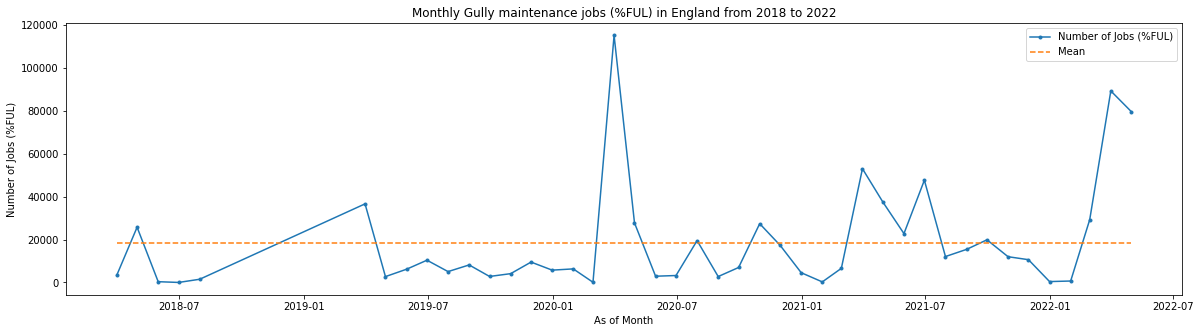

Average Jobs per month :  18443


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 3.1 Time Series - End of Month (SQL query)
df_jobs_ts = pd.read_sql_query( q_jobs_ts , conn)
print('Total Months recorded : ', len(df_jobs_ts))

# Assign x & y to df
x = df_jobs_ts.As_Of_YearMonth
y = df_jobs_ts.Num_Jobs 

# Calculate the simple average of the data
y_mean = [np.mean(y)]*len(x)

fig,ax = plt.subplots()

# Plot the data
data_line = ax.plot(x,y, label='Number of Jobs (%FUL)', marker='.')

# Plot the average line
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

# Make a legend
legend = ax.legend(loc='upper right')

# Title , X & Y labels
plt.gca().set(title='Monthly Gully maintenance jobs (%FUL) in England from 2018 to 2022', xlabel='As of Month', ylabel='Number of Jobs (%FUL)')

# Adjust the size
plt.rc('figure', figsize=(20, 5))

plt.show()
print('Average Jobs per month : ', round(np.mean(y)))

> **3.2 Time Series - Maintenance Regime (Interactive plot)**

In [30]:
import plotly.graph_objects as go
import pandas as pd

# 3.2 Aggregate data by EntryDateTime - Time Series (all dates)
s = pd.to_datetime(df_jobs_weather['EntryDateTime'])
df_jobs_ts_all = s.groupby(s.dt.floor('d')).size().reset_index(name='Num_Jobs')

# Create figure
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=list(df_jobs_ts_all.EntryDateTime), y=list(df_jobs_ts_all.Num_Jobs)))

# Set title
fig.update_layout(
    title_text= ("Total Gully maintenance jobs (%FUL) in England " + min_date + " to " + max_date)
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

> **3.3 Gully Clogging % over the years & months**

In [31]:
import plotly.express as px

# 3.3 Grouping by Year & % Full 
df_jobs_status_all = df_jobs2[(df_jobs2['% Full'] != 'Non Applicable') & (df_jobs2['% Full'] != 'Change Me')] \
                            .groupby(['Year', '% Full']) \
                            .size() \
                            .reset_index(name='Num_Jobs')

# Define figure
fig = px.bar( df_jobs_status_all, x='Year', y='Num_Jobs',
             color='% Full',
             color_discrete_sequence=['#339900', "#99cc33", "#ffcc00", "#ff9966", "#cc3300", 'black'],
             title="Total number of Jobs showing % Gully Blockage",
            #  text_auto='.2s',
             barmode='group',
             height=600
            )

fig.show()

In [32]:
import plotly.express as px

# 3.3 Grouping by Year_Month & % Full 
df_jobs_status_all = df_jobs2[(df_jobs2['% Full'] != 'Non Applicable') & (df_jobs2['% Full'] != 'Change Me')] \
                            .groupby(['Year_Month', '% Full']) \
                            .size() \
                            .reset_index(name='Num_Jobs')

df_jobs_status_all.head()

# Define figure
fig = px.bar( df_jobs_status_all, x='Year_Month', y='Num_Jobs',
             color='% Full',
             color_discrete_sequence=['#339900', "#99cc33", "#ffcc00", "#ff9966", "#cc3300"],   # 'black',
             title="Total number of Jobs showing % Gully Blockage",
            #  text_auto='.2s',
             barmode='stack',
             height=600
            )

fig.show()

> **3.4 Number of assets maintained against the frequency of maintenance**

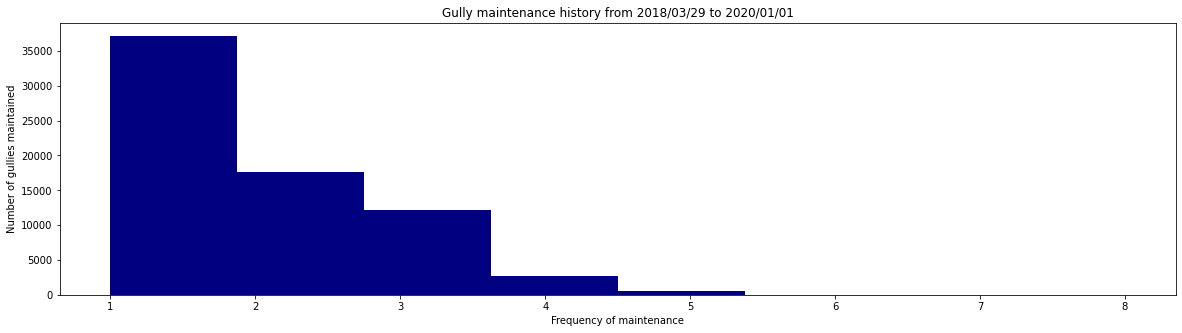

In [33]:
# Asset Maintenance History
df_mt_rg = df_jobs_weather.groupby('CentralAssetID').size().reset_index(name='Count')

# Calculate the bins and dates
bins = df_mt_rg.Count.max()

# Plot the histogram
plt.xlabel("Frequency of maintenance")
plt.ylabel("Number of gullies maintained")
plt.title("Gully maintenance history from " + min_date + ' to ' + max_date)
plt.hist(df_mt_rg.Count, bins=bins, color='navy')

plt.show()

**3.5 Floods Status & Cyclical Frequency determination**

In [35]:
# 3.5 Grouping by Year_Month & Floods
df_jobs_floods_grp = df_jobs_floods_f[(df_jobs_floods_f['% Full'] != 'Non Applicable') & (df_jobs_floods_f['% Full'] != 'Change Me')] \
                            .groupby(['Year_Month', 'FloodID', 'SectionID', '% Full']) \
                            .size() \
                            .reset_index(name='Num_Jobs')

fig3 = px.treemap(df_jobs_floods_grp, 
                  path=[ 'SectionID', 'FloodID', '% Full'], 
                  values='Num_Jobs', 
                  color='% Full',
                  title="Jobs performed within 2 weeks after the floods were reported",
                  color_discrete_sequence=[ "#ff9966", "#bab0ac",  "green", "#cc3300", '#316395' , "#fecb52" , "#e2e2e2"],
                  height=800,
                  width=600)

fig3.show()

**3.6 Cost of Maintenance**

In [36]:
# Payments made - Confidential Data 
# Number of asset failures & other jobs against the cost of maintenance per month in a given month

# Asset Maintenance History
df_job_cost = df_jobs_weather[['Year_Month', 'Asset_failure', 'Payment_Amount', 'JobID']]

df_job_cost['Asset_failure'] = np.where(df_job_cost['Asset_failure'] == 0, False, True)

df_job_cost = pd.pivot_table(df_job_cost,
                            index=['Year_Month', 'Asset_failure'],
                            aggfunc={'Payment_Amount': np.sum, 'JobID': len}
                            ).rename(columns={'JobID': 'Num_Jobs'}).reset_index()

# Define figure
fig = px.bar( df_job_cost, x='Year_Month', y='Payment_Amount',
             color='Asset_failure',
             color_discrete_sequence=["#7f7f7f" , "#cc3300"],
             title=("Payments made from " + min_date + ' to ' + max_date + " against the Gully status"),
             text_auto='.1s',
             barmode='stack',
             height=600
            )

fig.show()

> **3.7 Correlation Analysis**

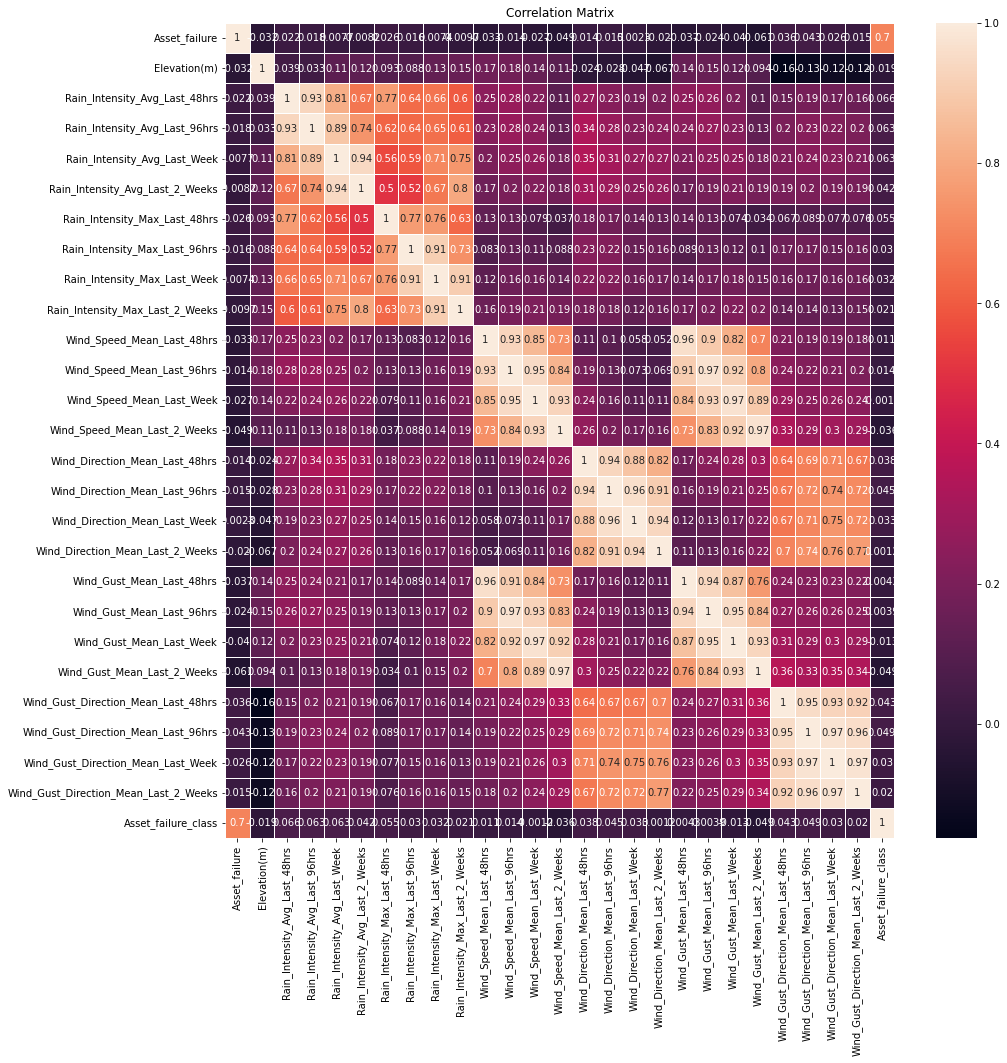

In [37]:
# Subset the required columns into a dataframe
df_corr = df_jobs_weather[['% Full', 'Asset_failure', 'Elevation(m)', 'Rain_Intensity_Avg_Last_48hrs', 'Rain_Intensity_Avg_Last_96hrs', 'Rain_Intensity_Avg_Last_Week', \
'Rain_Intensity_Avg_Last_2_Weeks', 'Rain_Intensity_Max_Last_48hrs', 'Rain_Intensity_Max_Last_96hrs', \
'Rain_Intensity_Max_Last_Week', 'Rain_Intensity_Max_Last_2_Weeks', 'Wind_Speed_Mean_Last_48hrs', \
'Wind_Speed_Mean_Last_96hrs', 'Wind_Speed_Mean_Last_Week', 'Wind_Speed_Mean_Last_2_Weeks', \
'Wind_Direction_Mean_Last_48hrs', 'Wind_Direction_Mean_Last_96hrs', 'Wind_Direction_Mean_Last_Week', \
 'Wind_Direction_Mean_Last_2_Weeks', 'Wind_Gust_Mean_Last_48hrs', 'Wind_Gust_Mean_Last_96hrs', \
 'Wind_Gust_Mean_Last_Week', 'Wind_Gust_Mean_Last_2_Weeks', 'Wind_Gust_Direction_Mean_Last_48hrs', \
 'Wind_Gust_Direction_Mean_Last_96hrs', 'Wind_Gust_Direction_Mean_Last_Week', 'Wind_Gust_Direction_Mean_Last_2_Weeks' ]]

# Converting categorical variable (% Full) into an ordinal & quanititative variable
df_corr['Asset_failure_class'] = np.where(df_corr['% Full'] == '75 - 100% Full', 4, 
                                            np.where(df_corr['% Full'] == '50 - 75% Full' , 3, 
                                                np.where(df_corr['% Full'] ==  '25 - 50% Full' , 2, 
                                                    np.where(df_corr['% Full'] ==  '0 - 25% Full' , 1, 
                                                        np.where(df_corr['% Full'] ==  '0 % (Clear)' , 0, -1)))))

# Plot the correlation matrix
corrMatrix = df_corr.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax).set(title='Correlation Matrix')
plt.show()

**4\. Classification**

- Subset the dataset to extract all the required columns
- Apply necessary transformations - replace/impute missing values & remove duplicates
- Data Preprocessing & model preparation
- Model training & evaluation

In [38]:
# Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Subset the required columns into a dataframe
df_class = df_jobs_weather[['Asset_failure_class', 'Elevation(m)', 'Rain_Intensity_Avg_Last_48hrs', 'Rain_Intensity_Avg_Last_96hrs', 'Rain_Intensity_Avg_Last_Week', \
'Rain_Intensity_Avg_Last_2_Weeks', 'Rain_Intensity_Max_Last_48hrs', 'Rain_Intensity_Max_Last_96hrs', \
'Rain_Intensity_Max_Last_Week', 'Rain_Intensity_Max_Last_2_Weeks', 'Wind_Speed_Mean_Last_48hrs', \
'Wind_Speed_Mean_Last_96hrs', 'Wind_Speed_Mean_Last_Week', 'Wind_Speed_Mean_Last_2_Weeks', \
'Wind_Direction_Mean_Last_48hrs', 'Wind_Direction_Mean_Last_96hrs', 'Wind_Direction_Mean_Last_Week', \
 'Wind_Direction_Mean_Last_2_Weeks', 'Wind_Gust_Mean_Last_48hrs', 'Wind_Gust_Mean_Last_96hrs', \
 'Wind_Gust_Mean_Last_Week', 'Wind_Gust_Mean_Last_2_Weeks', 'Wind_Gust_Direction_Mean_Last_48hrs', \
 'Wind_Gust_Direction_Mean_Last_96hrs', 'Wind_Gust_Direction_Mean_Last_Week', 'Wind_Gust_Direction_Mean_Last_2_Weeks' ]]

# Data Transformations - Replace & Impute blank values with resp. medians and drop the duplicates
df_class = df_class[df_class['Asset_failure_class'] != 'NA'].replace('', np.nan).fillna(df_class.median()).drop_duplicates()

# Data Preprocessing
x = df_class.drop('Asset_failure_class', axis=1)       # dep
y = df_class['Asset_failure_class']                    # indep
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=28)      # Model Preparation

print('################# Classification #################')

print('----> Value Counts:', '\n', df_class['Asset_failure_class'].value_counts())
print('----> Number of records in Training dataset:', len(x_train), 'and Number of records in Testing dataset:', len(x_test))

# Model training
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

# Evaluation using Training data
y_pred = classifier.predict(x_train)
print('************************', '\n', 'Training Dataset Evaluation: ' , '\n', '************************')
print('---> Confusion Matrix: ', '\n' , confusion_matrix(y_train, y_pred))
print('---> Classification Report: ', '\n' , classification_report(y_train, y_pred))

# Evaluation using Testing data
y_pred = classifier.predict(x_test)
print('************************', '\n', 'Testing Dataset Evaluation: ' , '\n', '************************')
print('---> Confusion Matrix: ', '\n' , confusion_matrix(y_test, y_pred))
print('---> Classification Report: ', '\n' , classification_report(y_test, y_pred))

################# Classification #################
----> Value Counts: 
 L1    1131
L0    1112
L2     993
Name: Asset_failure_class, dtype: int64
----> Number of records in Training dataset: 2427 and Number of records in Testing dataset: 809
************************ 
 Training Dataset Evaluation:  
 ************************
---> Confusion Matrix:  
 [[832   0   0]
 [507 341   0]
 [398 181 168]]
---> Classification Report:  
               precision    recall  f1-score   support

          L0       0.48      1.00      0.65       832
          L1       0.65      0.40      0.50       848
          L2       1.00      0.22      0.37       747

    accuracy                           0.55      2427
   macro avg       0.71      0.54      0.50      2427
weighted avg       0.70      0.55      0.51      2427

************************ 
 Testing Dataset Evaluation:  
 ************************
---> Confusion Matrix:  
 [[ 45 173  62]
 [196  23  64]
 [178  57  11]]
---> Classification Report:  
     

**5\. Logistic Regression**

- Subset the dataset to extract all the required columns
- Apply necessary transformations - replace/impute missing values & remove duplicates
- Data Preprocessing & model preparation
- Model training & evaluation
- Predictive Modelling

> **5.1 Model building and evaluation**

################# Logistic Regression #################
----> Value Counts: 
 0    76886
1    13436
Name: Asset_failure, dtype: int64
----> Number of records in Training dataset: 67741 and Number of records in Testing dataset: 22581


----> Model Accuracy (Training data) : 85.09 %
----> Model Accuracy (Testing data) : 85.16 %
----> Model Prediction : 100.0 %
----> Confusion Matrix :  
 [[19230     5]
 [ 3346     0]]


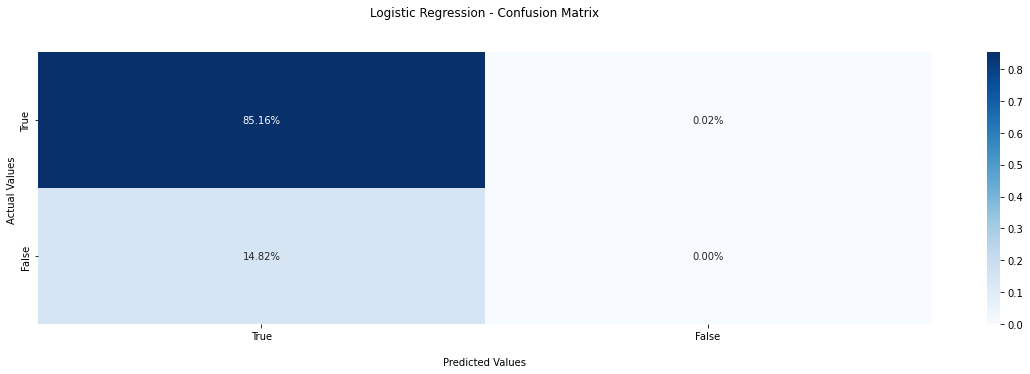

In [50]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Subset the required columns into a dataframe
df_logr = df_jobs_weather[df_jobs_weather['% Full'] != 'Change Me']
df_logr = df_logr[['Asset_failure', 'Elevation(m)', 'Rain_Intensity_Avg_Last_48hrs', 'Rain_Intensity_Avg_Last_96hrs', 'Rain_Intensity_Avg_Last_Week', \
'Rain_Intensity_Avg_Last_2_Weeks', 'Rain_Intensity_Max_Last_48hrs', 'Rain_Intensity_Max_Last_96hrs', \
'Rain_Intensity_Max_Last_Week', 'Rain_Intensity_Max_Last_2_Weeks', 'Wind_Speed_Mean_Last_48hrs', \
'Wind_Speed_Mean_Last_96hrs', 'Wind_Speed_Mean_Last_Week', 'Wind_Speed_Mean_Last_2_Weeks', \
'Wind_Direction_Mean_Last_48hrs', 'Wind_Direction_Mean_Last_96hrs', 'Wind_Direction_Mean_Last_Week', \
 'Wind_Direction_Mean_Last_2_Weeks', 'Wind_Gust_Mean_Last_48hrs', 'Wind_Gust_Mean_Last_96hrs', \
 'Wind_Gust_Mean_Last_Week', 'Wind_Gust_Mean_Last_2_Weeks', 'Wind_Gust_Direction_Mean_Last_48hrs', \
 'Wind_Gust_Direction_Mean_Last_96hrs', 'Wind_Gust_Direction_Mean_Last_Week', 'Wind_Gust_Direction_Mean_Last_2_Weeks' ]]

# Data Transformations - Replace & Impute blank values with resp. medians and drop the duplicates
df_logr = df_logr.replace('', np.nan).fillna(df_logr.median())

# Data Preprocessing
x = df_logr.drop('Asset_failure', axis=1)       # dep
y = df_logr['Asset_failure']                    # indep
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=28)      # Model Preparation

print('################# Logistic Regression #################')

print('----> Value Counts:', '\n', df_logr['Asset_failure'].value_counts())
print('----> Number of records in Training dataset:', len(x_train), 'and Number of records in Testing dataset:', len(x_test))

# Model training
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

# Determine Accuracy of Training data
score = logisticRegr.score(x_train, y_train)
print('----> Model Accuracy (Training data) :', round(score, 4)*100, '%' )

# Determine Accuracy of Testing data
score = logisticRegr.score(x_test, y_test)
print('----> Model Accuracy (Testing data) :', round(score, 4)*100, '%' )

# Predictive Analysis (for testing data)
y_pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_pred)
print('----> Model Prediction :', round(score, 4)*100, '%' )

# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('----> Confusion Matrix : ', '\n', confusion_matrix)

# Plot the confusion matrix
ax = sn.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Logistic Regression - Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.figure(1, figsize=(2, 2))
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

> **5.2 Predictive Analysis**

In [41]:
# Subset the required columns into a dataframe
df_logr_u = df_jobs_weather[(df_jobs_weather['% Full'] == 'Change Me') | (df_jobs_weather['% Full'] == 'Not Applicable')]
df_logr_u = df_logr_u[['Elevation(m)', 'Rain_Intensity_Avg_Last_48hrs', 'Rain_Intensity_Avg_Last_96hrs', 'Rain_Intensity_Avg_Last_Week', \
'Rain_Intensity_Avg_Last_2_Weeks', 'Rain_Intensity_Max_Last_48hrs', 'Rain_Intensity_Max_Last_96hrs', \
'Rain_Intensity_Max_Last_Week', 'Rain_Intensity_Max_Last_2_Weeks', 'Wind_Speed_Mean_Last_48hrs', \
'Wind_Speed_Mean_Last_96hrs', 'Wind_Speed_Mean_Last_Week', 'Wind_Speed_Mean_Last_2_Weeks', \
'Wind_Direction_Mean_Last_48hrs', 'Wind_Direction_Mean_Last_96hrs', 'Wind_Direction_Mean_Last_Week', \
 'Wind_Direction_Mean_Last_2_Weeks', 'Wind_Gust_Mean_Last_48hrs', 'Wind_Gust_Mean_Last_96hrs', \
 'Wind_Gust_Mean_Last_Week', 'Wind_Gust_Mean_Last_2_Weeks', 'Wind_Gust_Direction_Mean_Last_48hrs', \
 'Wind_Gust_Direction_Mean_Last_96hrs', 'Wind_Gust_Direction_Mean_Last_Week', 'Wind_Gust_Direction_Mean_Last_2_Weeks' ]]

# Data Transformations - Replace & Impute blank values with resp. medians and drop the duplicates
df_logr_u = df_logr_u.replace('', np.nan).fillna(df_logr_u.median())

# Predictive Analysis (for uncategorized data)
y_pred = logisticRegr.predict(df_logr_u)
score = logisticRegr.score(df_logr_u, y_pred)
print('----> Model Prediction for Uncategorized data:', round(score, 4)*100, '%' )

----> Model Prediction for Uncategorized data: 100.0 %


**6\. Anomaly Detection**

In [42]:
from sklearn.ensemble import IsolationForest

# Subset the requried data for anomaly detection
df_anom_det = df_jobs_floods_f[['FloodID', 'ReportedDateTime', 'FloodSeverityIndex', 'Asset_failure']]

# Necessary Transformations
df_anom_det['ReportedDateTime'] = pd.to_datetime(df_anom_det['ReportedDateTime'])
df_anom_det['Year'] = df_anom_det["ReportedDateTime"].dt.year
df_anom_det = df_anom_det.set_index('ReportedDateTime')

# Filter the data from before the Year 2013
df_anom_det = df_anom_det[df_anom_det['Year'] >= 2013 ]
del df_anom_det['Year']

# Create the model and fit the data
model = IsolationForest()
model.fit(df_anom_det)
predictions = model.predict(df_anom_det)
df_anom_det['predictions'] = predictions

# Renaming for identification
df_anom_det['Predicted'] = np.where(df_anom_det['predictions'] == -1, 'Outliers', 'Inliers')
df_anom_det['Asset_failure_type'] = np.where(df_anom_det['Asset_failure'] == 0, 'Not failed', 'Failed')
df_anom_det['Asset_failure'] = np.where(df_anom_det['Asset_failure'] == 0, 0.1, 0.9)

print('################# Anomaly Detection #################')

# How many Asset failures / Gullies fully clogged ?  
print('-------> Asset Failures:' , '\n' , df_anom_det.Asset_failure_type.value_counts())

# How many outliers found?  1 - Inliers and -1 - Outliers
print('-------> Outliers vs. Inliers:' , '\n' , df_anom_det['predictions'].value_counts())

# #summary statistics
df_anom_det['FloodSeverityIndex'].describe()

# Scatter Plot
fig = px.scatter(df_anom_det, 
                        x=df_anom_det.index, 
                        y="FloodSeverityIndex", 
                        color="Predicted", 
                        size="Asset_failure",
                        opacity = 0.3, 
                        color_discrete_sequence=[ "#7f7f7f", "#cc3300"],
                        title=("Anomalies detected within floods against gully failures"))

fig.show()

################# Anomaly Detection #################
-------> Asset Failures: 
 Not failed    721
Failed        122
Name: Asset_failure_type, dtype: int64
-------> Outliers vs. Inliers: 
  1    565
-1    278
Name: predictions, dtype: int64
